In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df=pd.read_csv('data/gdp_percapita.csv')

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,2190.240321,NaN
1,Afghanistan,2017,2202.570851,NaN
2,Afghanistan,2016,2200.764487,NaN
3,Afghanistan,2015,2212.750899,NaN
4,Afghanistan,2014,2249.253738,NaN
5,Afghanistan,2013,2264.317575,NaN


In [5]:
internet_df=pd.read_csv('data/internet_use.csv')

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [7]:
print("GDP Shap: ", gdp_df.shape)
print("Intrnet Shape: ", internet_df.shape)

GDP Shap:  (6608, 4)
Intrnet Shape:  (4676, 4)


In [8]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
print(gdp_df.tail(6))

     Country or Area                                      Year        Value  \
6602        Zimbabwe                                      1993  3033.504852   
6603        Zimbabwe                                      1992  3054.889178   
6604        Zimbabwe                                      1991  3426.598094   
6605        Zimbabwe                                      1990  3324.348171   
6606   footnoteSeqID                                  Footnote          NaN   
6607               2  Excludes South Sudan after July 9, 2011.          NaN   

      Value Footnotes  
6602              NaN  
6603              NaN  
6604              NaN  
6605              NaN  
6606              NaN  
6607              NaN  


In [11]:
print(internet_df.tail(6))

     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             177  Pew Internet Project, 'Internet, Broadband and...   
4673             178  Estimated based on Survey's results. Populatio...   
4674             179                     Preliminary. Country estimate.   
4675             180  The methodology used to estimated the figure f...   

      Value  Value Footnotes  
4670    NaN              NaN  
4671    NaN              NaN  
4672    NaN              NaN  
4673    NaN              NaN  
4674    NaN              NaN  
4675    NaN              NaN  


In [12]:
gdp_df=gdp_df.drop('Value Footnotes',axis=1)

In [13]:
internet_df=internet_df.drop('Value Footnotes',axis=1)

In [14]:
internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'}, inplace=True)

In [15]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [16]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4671,176,NTIA/CPS survey.,NaN
4672,177,"Pew Internet Project, 'Internet, Broadband and...",NaN
4673,178,Estimated based on Survey's results. Populatio...,NaN
4674,179,Preliminary. Country estimate.,NaN


In [17]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df)

In [18]:
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2249.253738
1,Afghanistan,2013,5.900000,2264.317575
2,Afghanistan,2012,5.454545,2220.481526
3,Afghanistan,2011,5.000000,2037.608607
4,Afghanistan,2010,4.000000,2093.743565
...,...,...,...,...
3433,Zimbabwe,1996,0.016790,3520.430146
3434,Zimbabwe,1995,0.007684,3226.413930
3435,Zimbabwe,1994,0.001739,3263.934978
3436,Zimbabwe,1990,0.000000,3324.348171


In [19]:
gdp_and_internet_use_sub = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2004')|(gdp_and_internet_use['Year']=='2009')|(gdp_and_internet_use['Year']=='2014')]
gdp_and_internet_use_sub

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2249.253738
5,Afghanistan,2009,3.550000,1881.777626
10,Afghanistan,2004,0.105809,1284.127338
13,Albania,2014,60.100000,11828.232264
18,Albania,2009,41.200000,10528.778102
...,...,...,...,...
3398,Zambia,2009,6.310000,2917.522504
3403,Zambia,2004,2.013550,2261.771409
3415,Zimbabwe,2014,19.890000,2955.240287
3420,Zimbabwe,2009,11.360000,1925.364381


In [20]:
gdp_and_internet_use_2004 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2004')]
gdp_and_internet_use_2009 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2009')]
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use['Year']=='2014')]

In [21]:
gdp_and_internet_use_2004

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
10,Afghanistan,2004,0.105809,1284.127338
23,Albania,2004,2.420388,7738.542836
44,Algeria,2004,4.634475,9898.310490
66,Angola,2004,0.464815,5568.959139
86,Antigua and Barbuda,2004,24.266544,18742.463741
...,...,...,...,...
3340,Uruguay,2004,17.063098,12479.966872
3362,Uzbekistan,2004,2.593725,3221.189333
3383,Vanuatu,2004,4.746603,2796.426115
3403,Zambia,2004,2.013550,2261.771409


In [22]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1360,Iceland,2014,98.16,49911.069825


In [23]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']==gdp_and_internet_use_2014['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3066,Timor-Leste,2014,1.14,3264.739189


# 2009

In [24]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1365,Iceland,2009,93.0,48428.312438


In [25]:
gdp_and_internet_use_2009[gdp_and_internet_use_2009['Internet_Users_Pct']==gdp_and_internet_use_2009['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3071,Timor-Leste,2009,0.185252,2724.834868


In [26]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
2964,Sweden,2004,83.89,45029.814344


In [27]:
gdp_and_internet_use_2004[gdp_and_internet_use_2004['Internet_Users_Pct']==gdp_and_internet_use_2004['Internet_Users_Pct'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
2111,Myanmar,2004,0.024337,1696.88176


In [28]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].max()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1777,Luxembourg,2014,94.67,108911.348894


In [29]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita']==gdp_and_internet_use_2014['GDP_Per_Capita'].min()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
519,Burundi,2014,1.38,886.235777


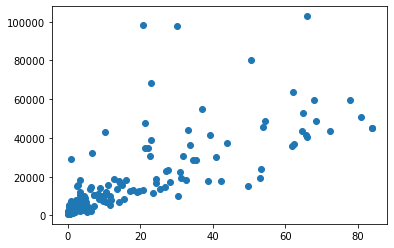

In [30]:
o4=plt.scatter( x=gdp_and_internet_use_2004['Internet_Users_Pct'], y=gdp_and_internet_use_2004['GDP_Per_Capita'],
           )

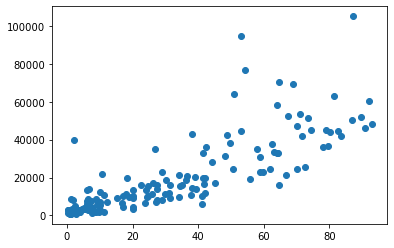

In [31]:
o9=plt.scatter(gdp_and_internet_use_2009.Internet_Users_Pct, gdp_and_internet_use_2009.GDP_Per_Capita
           )

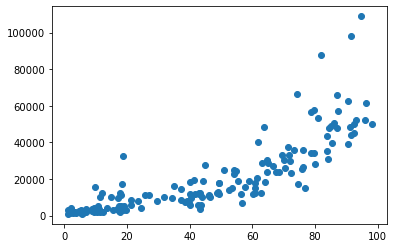

In [32]:
o14=plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita
           )

# As the internet ages, a distinctive trend line appears between internet use and gdp.

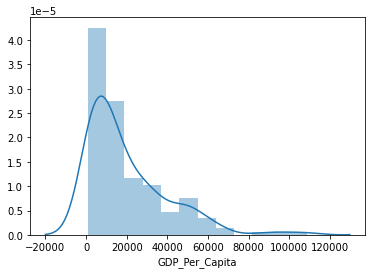

In [33]:
sns.distplot(gdp_and_internet_use_2014['GDP_Per_Capita'])

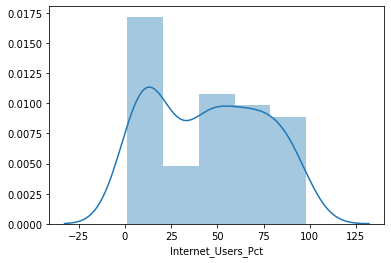

In [34]:
sns.distplot(gdp_and_internet_use_2014['Internet_Users_Pct'])

In [35]:
top_5=gdp_and_internet_use_2014.sort_values(by=['Internet_Users_Pct'], ascending=False).head(5)
top_5

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1360,Iceland,2014,98.16,49911.069825
2275,Norway,2014,96.30,61308.763730
833,Denmark,2014,95.99,52172.606425
1777,Luxembourg,2014,94.67,108911.348894
2164,Netherlands,2014,93.17,52432.619199


In [36]:
gdp_and_internet_use_sub_c=gdp_and_internet_use_sub.set_index('Country')
top_5_internet = gdp_and_internet_use_sub_c.loc[['Iceland', 'Norway', 'Denmark', 'Luxembourg', 'Netherlands']]
top_5_internet

,Year,Internet_Users_Pct,GDP_Per_Capita
Country,,,
Iceland,2014,98.16,49911.069825
Iceland,2009,93.00,48428.312438
Iceland,2004,83.88,45380.965464
Norway,2014,96.30,61308.763730
Norway,2009,92.08,60620.334503
Norway,2004,77.69,59647.501415
Denmark,2014,95.99,52172.606425
Denmark,2009,86.84,50233.702688
Denmark,2004,80.93,50566.988088


In [37]:
gdp_and_internet_use_su = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Country'].isin(top_5.Country)]
gdp_and_internet_use_su

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
833,Denmark,2014,95.99,52172.606425
838,Denmark,2009,86.84,50233.702688
843,Denmark,2004,80.93,50566.988088
1360,Iceland,2014,98.16,49911.069825
1365,Iceland,2009,93.00,48428.312438
1370,Iceland,2004,83.88,45380.965464
1777,Luxembourg,2014,94.67,108911.348894
1782,Luxembourg,2009,87.31,105077.951508
1787,Luxembourg,2004,65.88,102850.273309
2164,Netherlands,2014,93.17,52432.619199


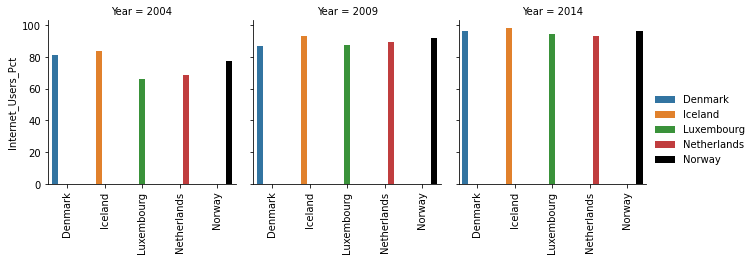

In [60]:
i= sns.FacetGrid(gdp_and_internet_use_su, col="Year")
sns.color_palette("tab10")
i.map_dataframe(sns.barplot, x="Country", y="Internet_Users_Pct", hue="Country", palette=["C0","C1","C2","C3", "k"])

i.set_axis_labels('',"Internet_Users_Pct")
for axes in i.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

i.add_legend()

In [39]:
bot_5=gdp_and_internet_use_2014.sort_values(by=['Internet_Users_Pct'], ascending=True).head(5)
bot_5

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3066,Timor-Leste,2014,1.14,3264.739189
519,Burundi,2014,1.38,886.235777
1240,Guinea,2014,1.72,2063.411291
2235,Niger,2014,1.95,1126.153622
2101,Myanmar,2014,2.10,4020.037369


In [40]:
gdp_and_internet_use_b5 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Country'].isin(bot_5.Country)]
gdp_and_internet_use_b5

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
519,Burundi,2014,1.380000,886.235777
524,Burundi,2009,0.900000,831.564131
529,Burundi,2004,0.349060,817.460585
1240,Guinea,2014,1.720000,2063.411291
1245,Guinea,2009,0.940000,1827.194624
1250,Guinea,2004,0.508819,1779.530162
2101,Myanmar,2014,2.100000,4020.037369
2106,Myanmar,2009,0.220000,2874.780227
2111,Myanmar,2004,0.024337,1696.881760
2235,Niger,2014,1.950000,1126.153622


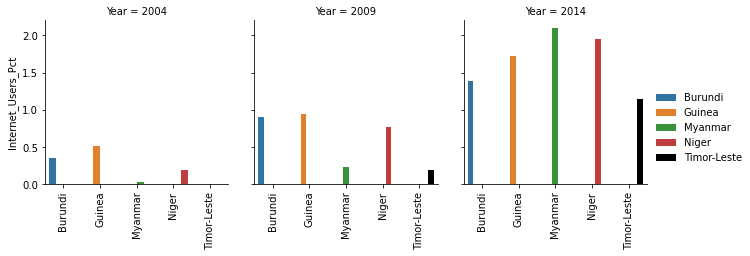

In [61]:
p= sns.FacetGrid(gdp_and_internet_use_b5, col="Year")
sns.color_palette("tab10")
p.map_dataframe(sns.barplot, x="Country", y="Internet_Users_Pct", hue="Country", palette=["C0","C1","C2","C3", "k"])

p.set_axis_labels('',"Internet_Users_Pct")

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

p.add_legend()

In [51]:
gdp_t5_14=gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'], ascending=False).head(5)
gdp_t5_14

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
1777,Luxembourg,2014,94.67,108911.348894
2521,Qatar,2014,91.49,97938.305225
2730,Singapore,2014,82.00,87808.663157
606,Cayman Islands,2014,74.10,66195.475587
2979,Switzerland,2014,87.00,66038.684134


In [52]:
gdp_t5 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Country'].isin(gdp_t5_14.Country)]
gdp_t5

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
606,Cayman Islands,2014,74.100000,66195.475587
611,Cayman Islands,2009,64.500000,70287.622992
1777,Luxembourg,2014,94.670000,108911.348894
1782,Luxembourg,2009,87.310000,105077.951508
1787,Luxembourg,2004,65.880000,102850.273309
2521,Qatar,2014,91.490000,97938.305225
2526,Qatar,2009,53.100000,94440.370835
2531,Qatar,2004,20.701648,98423.340291
2730,Singapore,2014,82.000000,87808.663157
2735,Singapore,2009,69.000000,69466.581746


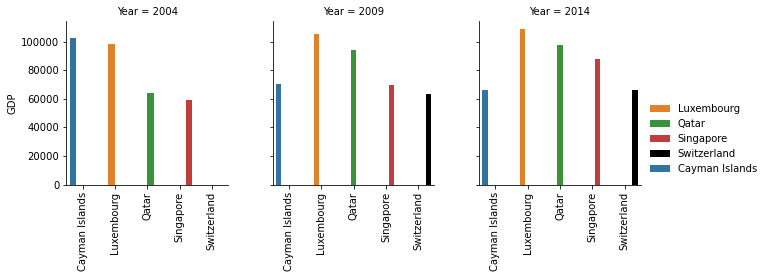

In [62]:
x= sns.FacetGrid(gdp_t5, col="Year")
sns.color_palette("tab10")
x.map_dataframe(sns.barplot, x="Country", y="GDP_Per_Capita", hue="Country", palette=["C0","C1","C2","C3", "k"])

x.set_axis_labels('',"GDP")

for axes in x.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
x.add_legend()

In [63]:
gdp_b5_14=gdp_and_internet_use_2014.sort_values(by=['GDP_Per_Capita'], ascending=True).head(5)
gdp_b5_14

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
519,Burundi,2014,1.38,886.235777
1821,Malawi,2014,5.83,1027.208496
2235,Niger,2014,1.95,1126.153622
2081,Mozambique,2014,5.94,1217.090210
3077,Togo,2014,5.70,1404.132938


In [64]:
gdp_b5 = gdp_and_internet_use_sub[gdp_and_internet_use_sub['Country'].isin(gdp_b5_14.Country)]
gdp_b5

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
519,Burundi,2014,1.380000,886.235777
524,Burundi,2009,0.900000,831.564131
529,Burundi,2004,0.349060,817.460585
1821,Malawi,2014,5.830000,1027.208496
1826,Malawi,2009,1.070000,932.867635
1831,Malawi,2004,0.347505,775.346132
2081,Mozambique,2014,5.940000,1217.090210
2086,Mozambique,2009,2.680000,991.581978
2091,Mozambique,2004,0.679448,793.168857
2235,Niger,2014,1.950000,1126.153622


Text(0.5, 1.0, 'Bottom GDP in 2014')

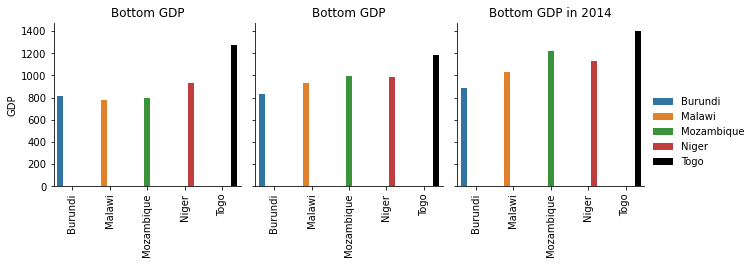

In [71]:
x= sns.FacetGrid(gdp_b5, col="Year")
sns.color_palette("tab10")
x.map_dataframe(sns.barplot, x="Country", y="GDP_Per_Capita", hue="Country", palette=["C0","C1","C2","C3", "k"])

x.set_axis_labels('',"GDP")

for axes in x.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
for axes in x.axes.flat:
    _ = axes.set_title("Bottom GDP")
    
x.add_legend()
plt.title("Bottom GDP in 2014")